### Libraries

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove

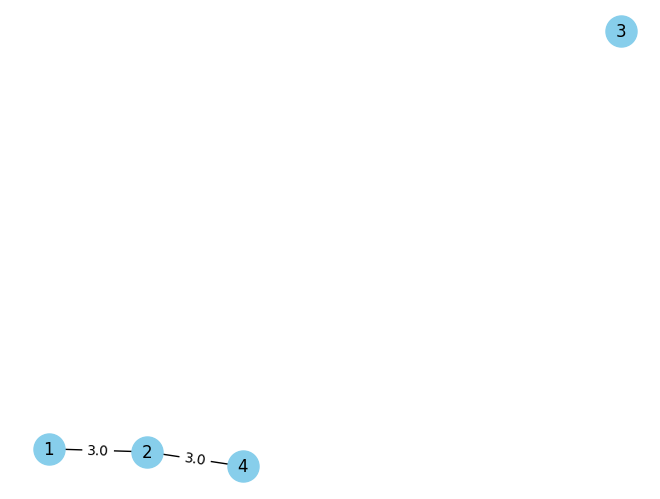


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit


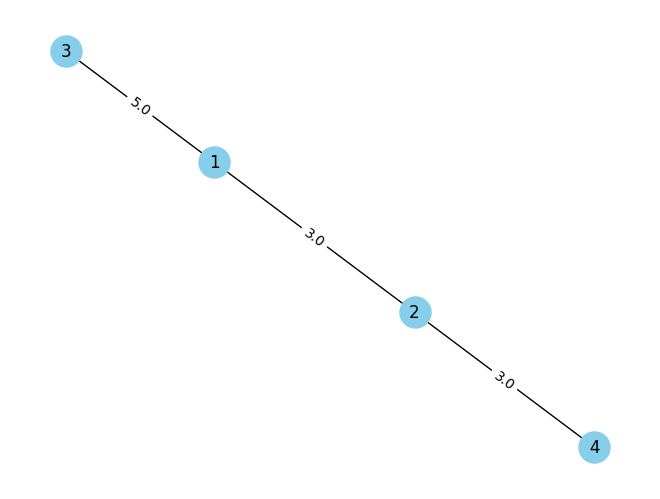


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit

Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit


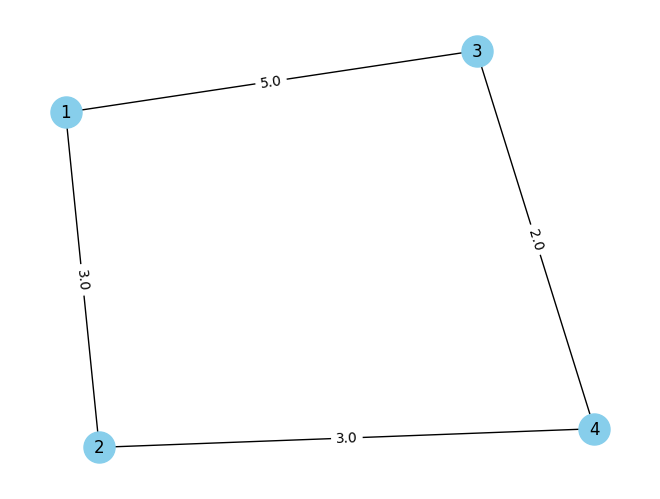


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit
Shortest Path: ['1', '2', '4']
Shortest Distance: 6.0


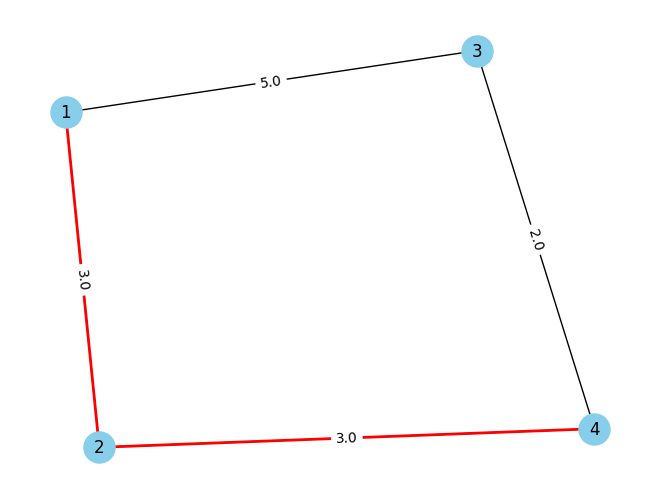


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit
Shortest Path: ['1', '3']
Shortest Distance: 5.0


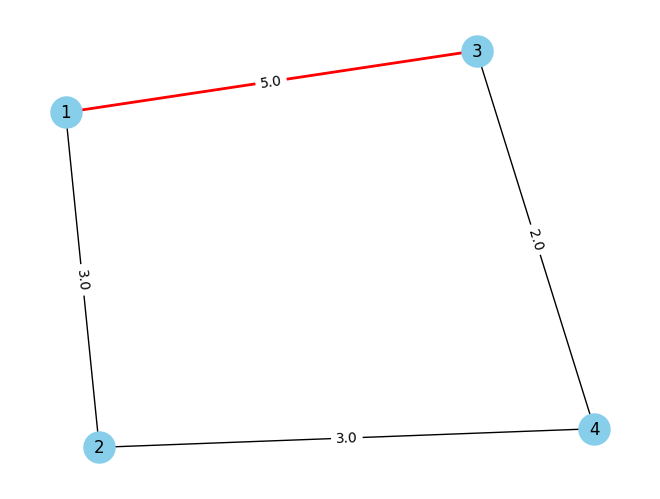


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit
Shortest Path: ['2', '4', '3']
Shortest Distance: 5.0


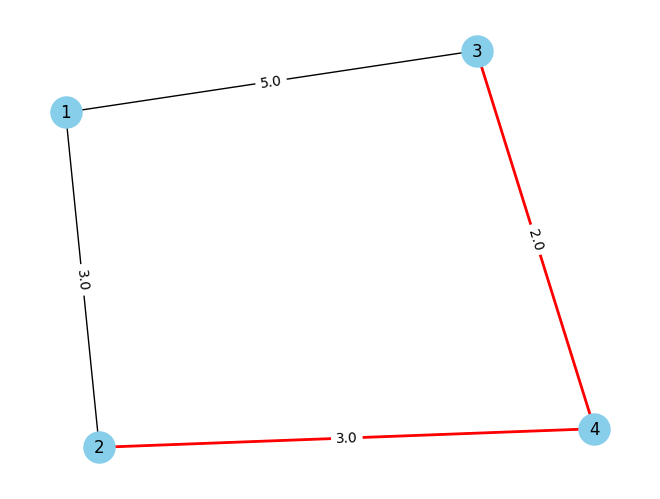


Menu:
1. Add Node
2. Remove Node
3. Add Edge
4. Remove Edge
5. Visualize Network
6. Find Shortest Path (Dijkstra's Algorithm)
7. Exit


In [9]:
class NetworkSimulation:
    def __init__(self):
        self.graph = nx.Graph()
        self.pos = None

    def add_node(self, node):
        self.graph.add_node(node)

    def remove_node(self, node):
        self.graph.remove_node(node)

    def add_edge(self, node1, node2, weight):
        self.graph.add_edge(node1, node2, weight=weight)

    def remove_edge(self, node1, node2):
        self.graph.remove_edge(node1, node2)

    def visualize_network(self):
        self.pos = nx.spring_layout(self.graph)
        nx.draw(self.graph, pos=self.pos, with_labels=True, node_color='skyblue', node_size=500)
        edge_labels = {(u, v): d['weight'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos=self.pos, edge_labels=edge_labels)
        plt.show()

    def dijkstra(self, start, end):
        shortest_path = nx.dijkstra_path(self.graph, start, end)
        shortest_distance = nx.dijkstra_path_length(self.graph, start, end)
        return shortest_path, shortest_distance

    def visualize_shortest_path(self, shortest_path):
        if self.pos is None:
            self.pos = nx.spring_layout(self.graph)
            
        path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

        nx.draw(self.graph, pos=self.pos, with_labels=True, node_color='skyblue', node_size=500)
        nx.draw_networkx_edges(self.graph, pos=self.pos, edgelist=path_edges, edge_color='red', width=2.0)
        edge_labels = {(u, v): d['weight'] for u, v, d in self.graph.edges(data=True)}
        nx.draw_networkx_edge_labels(self.graph, pos=self.pos, edge_labels=edge_labels)
        plt.show()

def main():
    network = NetworkSimulation()

    while True:
        print("\nMenu:")
        print("1. Add Node")
        print("2. Remove Node")
        print("3. Add Edge")
        print("4. Remove Edge")
        print("5. Visualize Network")
        print("6. Find Shortest Path (Dijkstra's Algorithm)")
        print("7. Exit")

        choice = input("Enter your choice: ")

        if choice == '1':
            node = input("Enter node to add: ")
            network.add_node(node)
        elif choice == '2':
            node = input("Enter node to remove: ")
            network.remove_node(node)
        elif choice == '3':
            node1 = input("Enter first node: ")
            node2 = input("Enter second node: ")
            weight = float(input("Enter edge weight: "))
            network.add_edge(node1, node2, weight)
        elif choice == '4':
            node1 = input("Enter first node: ")
            node2 = input("Enter second node: ")
            network.remove_edge(node1, node2)
        elif choice == '5':
            network.visualize_network()
        elif choice == '6':
            start = input("Enter start node: ")
            end = input("Enter end node: ")
            shortest_path, shortest_distance = network.dijkstra(start, end)
            print("Shortest Path:", shortest_path)
            print("Shortest Distance:", shortest_distance)
            network.visualize_shortest_path(shortest_path)
        elif choice == '7':
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()